In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
# Loads data to be used for training
# Training data contains 2000 images with each the size of 30000
# 100 x 100 x 3 (pixel width * pixel length * rgb colors)
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

# Loads data to be used for testing
# Testing data contains 400 images with each the size of 30000
# 100 x 100 x 3 (pixel width * pixel length * rgb colors)
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


In [5]:
# Reshape data for training
# Breakdown 30000 to 100, 100, 3
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# Values are in RGB (0 - 255)
# We want to rescale them from 0 to 1 for training
# Divide all values by 255
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [8]:
# Sequential means that the layers are created sequentially
model = Sequential([

    # FIRST LAYER

    # Conv2D - 2D convolution layer
    
    # 32 filters - used to scan images and to produce some results that tells gives us an idea about the image's features
    # Filters aren't defined, the values are learned during the training process

    # (3, 3) - size of filter, height x width
    # 'relu' - activiation function, removes negative values
    # input shape - what kind of shape the model is expecting
    # 3 100 x 100 images
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),

    # (2, 2) - filter size, height x width
    # Down samples features to reduce image size and to reduce computational cost
    MaxPooling2D((2,2)),
    
    # SECOND LAYER

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    # Converts data into a 1-dimensional array
    Flatten(),

    # THIRD LAYER

    # Dense Layer - fully connected layers
    # 64 - number of nuerons
    # 'relu' -activation function
    Dense(64, activation = 'relu'),

    # OUTPUT LAYER

    # Only have 1 output because we're using binary classification
    # Due to that, we're using the sigmoid activation function, result will range from 0 to 1
    Dense(1, activation = 'sigmoid')
])

In [14]:
# Add our loss function and back propagation model

# Loss Function
# binary_crossentropy computes the cross-entropy loss between the true labels and predicted labels, used for binary classification

# Back  Propagation
# adam is a stochastic gradient descent method

# Metrics
# A function that is used to jduge the performance of the model
# Similar to loss functions, but the results aren't used for training the model
# accuracy calculates how often predicitons equal to the labels
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# fit trains the data
# X_train and Y_Train are inputs
# epochs are the number of times we want to train the model
# batch size is the number of sampels we want to use to train the model
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 8s 220ms/step - loss: 0.0890 - accuracy: 0.9690
Epoch 2/5
32/32 [==============================] - 7s 229ms/step - loss: 0.0256 - accuracy: 0.9965
Epoch 3/5
32/32 [==============================] - 8s 242ms/step - loss: 0.0106 - accuracy: 0.9995
Epoch 4/5
32/32 [==============================] - 8s 260ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 9s 291ms/step - loss: 0.0059 - accuracy: 1.0000


In [13]:
# Evaluate model's performance on the testing data
model.evaluate(X_test, Y_test)

# Low accuracy can be due to the small dataset

13/13 [==============================] - 0s 28ms/step - loss: 1.4193 - accuracy: 0.6650


[1.4192824363708496, 0.6650000214576721]

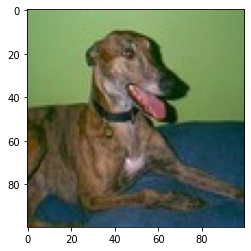

Our model says it is a : dog


In [12]:
# Get a random image
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2])
plt.show()

# Reshape image
# Pass it to our model
y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

# Classify it as either a dog or a cat
if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)